<a href="https://colab.research.google.com/github/namwootree/Basic_Skill/blob/main/Time_Series/%EA%B8%88%EC%9C%B5%20%ED%8C%8C%EC%9D%B4%EC%8D%AC%20%EC%BF%A1%EB%B6%81/7%EC%9E%A5_%ED%8C%8C%EC%9D%B4%EC%8D%AC%EC%9C%BC%EB%A1%9C_%EC%9E%90%EC%82%B0_%EB%B0%B0%EB%B6%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting

In [2]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [4]:
!pip install pyfolio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 91 kB 5.7 MB/s 
     |████████████████████████████████| 52 kB 1.7 MB/s 
     |████████████████████████████████| 1.6 MB 16.5 MB/s 
  Created wheel for pyfolio: filename=pyfolio-0.9.2-py3-none-any.whl size=88682 sha256=3e034af097b5e0a61dd4df2a45a3cf843a3873f03748cf959c6ea9fc2f32d926
  Stored in directory: /root/.cache/pip/wheels/e4/96/9b/0dfff5453e702fd780a099b7c850521099c5ec0dfafae189f9
  Created wheel for empyrical: filename=empyrical-0.5.5-py3-none-any.whl size=39780 sha256=c858d41e96dc4adf9c7d79d7e1b7bf2d43ad59aa4dd6e14e89f0945fba0f83e1
  Stored in directory: /root/.cache/pip/wheels/d9/91/4b/654fcff57477efcf149eaca236da2fce991526cbab431bf312
Successfully built pyfolio empyrical


In [5]:
import yfinance as yf

import pyfolio as pf

/usr/local/lib/python3.7/dist-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; mutltipliers will not be applied' +


In [6]:
import numpy as np
import pandas as pd

In [28]:
import matplotlib.pyplot as plt

In [31]:
import scipy.optimize as sco

# 자산 배분

* 투자자의 총 투자액을 특정 자산에 분산시키는 것
* 배분을 고려할 때 투자자는 위험과 잠재적 보상 사이의 균형을 유지하려 한다
* 동시에 배분은 개별 목표, 위험 허용치, 또는 투자 기간과 같은 요인에 따라 달라진다

# 현대 포트폴리오 이론

* 특정 위험 수준에 대해 기대 수익률을을 극대화하고자 위험을 피하며 포트폴리오를 구성하는 방법을 설명
* 투자자는 자산 성과 만 평가하지 말고 여러 지표가 자산 포트폴리오의 성과에 어떤 영향을 미치는지 조사해야 한다

다각화

* 단순히 다른 종류의 자산을 소유하는 것만으로도 위험이 줄어든다
* 개별 주식으로부터의 손실이나 이익이 포트폴리오 전체의 성능에 미치는 영향이 줄어듬
* 포트폴리오 수익률은 개별 자산 수익률의 가중 평균이지만 위험에 대해서는 그렇지 않으며, 자산 간의 상관관계에 따라 다르다
* 최적화된 자산 배분 덕분에 포트폴리오 내 개별 자산 중 가장 낮은 변동성을 가진 것보다 더 변동서잉 낮은 포트폴리오를 가질 수 있다는 것
* 원칙적으로 보유 자산 간의 상관관계가 낮을수록 다각화에 좋음

주요 가정

* 투자자는 합리적이고 수익을 극대화하는 동시에 가능한 한 위험을 피하는 것을 목표로 한다
* 투자자들은 기대 수익을 극대화하려는 목표를 공유한다
* 모든 투자자는 잠재적 투자에 대해 동일한 수준의 정보를 보유한다
* 커미션, 세금, 거래 비용은 고려되지 않는다
* 투자자는 무위험 금리로 돈을 빌리거나 빌려 줄 수 있다

# 기본 1/n 포트폴리오의 성능 평가

In [7]:
RISKY_ASSET = ['AAPL', 'IBM', 'MSFT', 'TWTR']
START_DATE = '2020-01-01'
END_DATE = '2021-12-31'

n_assets = len(RISKY_ASSET)

In [8]:
prices_df = yf.download(RISKY_ASSET,
                        start = START_DATE,
                        end = END_DATE,
                        adjusted =True)

[*********************100%***********************]  4 of 4 completed


In [12]:
prices_df.head()

Adj Close                                         Close  \
                 AAPL         IBM        MSFT       TWTR       AAPL   
Date                                                                  
2020-01-02  73.683556  112.916931  156.591995  32.299999  75.087502   
2020-01-03  72.967209  112.016411  154.642151  31.520000  74.357498   
2020-01-06  73.548637  111.816292  155.041885  31.639999  74.949997   
2020-01-07  73.202736  111.891319  153.628235  32.540001  74.597504   
2020-01-08  74.380287  112.825218  156.075272  33.049999  75.797501   

                                                    High              ...  \
                   IBM        MSFT       TWTR       AAPL         IBM  ...   
Date                                                                  ...   
2020-01-02  129.464630  160.619995  32.299999  75.150002  129.942642  ...   
2020-01-03  128.432129  158.619995  31.520000  75.144997  128.929260  ...   
2020-01-06  128.202682  159.029999  31.639999  74.989998  128.336517  ...   
2020-01-07  128.288712  157.580002  32.540001  75.224998  129.024857  ...   
2020-01-08  129.359467  160.089996  33.049999  76.110001  129.885284  ...   

                   Low                  Open                          \
                  MSFT       TWTR       AAPL         IBM        MSFT   
Date                                                                   
2020-01-02  158.330002  31.959999  74.059998  129.063095  158.779999   
2020-01-03  158.059998  31.260000  74.287498  127.695984  158.320007   
2020-01-06  156.509995  31.160000  73.447502  127.552582  157.080002   
2020-01-07  157.320007  31.719999  74.959999  127.810707  159.320007   
2020-01-08  157.949997  32.349998  74.290001  128.594650  158.929993   

                          Volume                               
                 TWTR       AAPL      IBM      MSFT      TWTR  
Date                                                           
2020-01-02  32.310001  135480400  3293436  22622100  10721100  
2020-01-03  31.709999  146322800  2482890  21116200  14429500  
2020-01-06  31.230000  118387200  2537073  20813700  12582500  
2020-01-07  31.799999  108872000  3232977  21634100  13712900  
2020-01-08  32.349998  132079200  4545916  27746500  14632400  

[5 rows x 24 columns]

In [9]:
returns = prices_df['Adj Close'].pct_change().dropna()

In [13]:
returns.head()

,AAPL,IBM,MSFT,TWTR
Date,,,,
2020-01-03,-0.009722,-0.007975,-0.012452,-0.024149
2020-01-06,0.007968,-0.001787,0.002585,0.003807
2020-01-07,-0.004703,0.000671,-0.009118,0.028445
2020-01-08,0.016086,0.008346,0.015928,0.015673
2020-01-09,0.021241,0.010568,0.012493,0.005144


In [10]:
portfolio_weight = n_assets * [1 / n_assets]

In [11]:
portfolio_returns = pd.Series(np.dot(portfolio_weight, returns.T), index = returns.index)

In [14]:
portfolio_returns

Date
2020-01-03   -0.013574
2020-01-06    0.003143
2020-01-07    0.003824
2020-01-08    0.014008
2020-01-09    0.012361
                ...   
2021-12-23    0.005205
2021-12-27    0.014397
2021-12-28   -0.005475
2021-12-29   -0.001861
2021-12-30    0.007422
Length: 503, dtype: float64

**샤프 비율**
  * 표준 편차 단위 당 초과 수익률을 측정
  * 무위험 금리가 제공되지 않으면 기본 가정은 0 %로 설정
  * 샤프 비율이 클수록 포트폴리오의 위험 조정 성능이 향상

<br>

**최대 드로우다운**
  * 포트폴리오의 하락 위험에 대한 지표로서 투자 과정에서 가장 큰 피크-대비-밸리 손실을 측정
  * 최대 드로우다운이 낮을수록 좋다

<br>

**칼마 비율**
  * 평균 연복리 수익률을 동일 기간 동안의 최대 드로우다운으로 나눈 값으로 정의
  * 비율이 높을수록 좋다

<br>

**안정성**
  * 누적 로그 수익률에 대한 선형 적합의 R-제곱으로 측정
  * 누적 로그 수익률에 대한 정수 범위 회귀를 적용하는 것

<br>

**오메가 비율**
  * 결정된 수익 목표 임계값에 대한 손실 대비 이익의 확률 가중 비율
  * 모든 수익률 분포 모멘트를 고려

<br>

**소르티노 비율**
  * 분포의 표준 편차가 하방 편차로 대체

<br>

**왜도**
  * 주어진 분포가 정규 분포보다 비뚤어진 정도를 측정

<br>

**첨도**
  * 꼬리 중 하나에서 극단적인 값을 측정

<br>

**꼬리 비율**
  * 일 수익률의 95번째와 5번째 백분위 수 사이의 비율

**누적 수익률 그림**
  * 시간의 흐름에 따른 포트폴리오의 가치 변화를 보여줌

<br>

**롤링 샤프 비율**
  * 시간에 대해 하나의 숫자만 보고하는 대신 샤프 비율이 얼마나 안정적이었는지 확인하는 것

<br>

**수중 그림**
  * 손실에 중점을 둔 비관적인 관점에서 투자를 표시
  * 모든 도로우다운 기간과 함께 새로운 고점으로 회복할 때까지 지속 기간을 표시

Start date,2020-01-03
End date,2021-12-30
Total months,23
,Backtest
Annual return,34.4%
Cumulative returns,80.4%
Annual volatility,31.6%
Sharpe ratio,1.10
Calmar ratio,1.05
Stability,0.88
Max drawdown,-32.7%


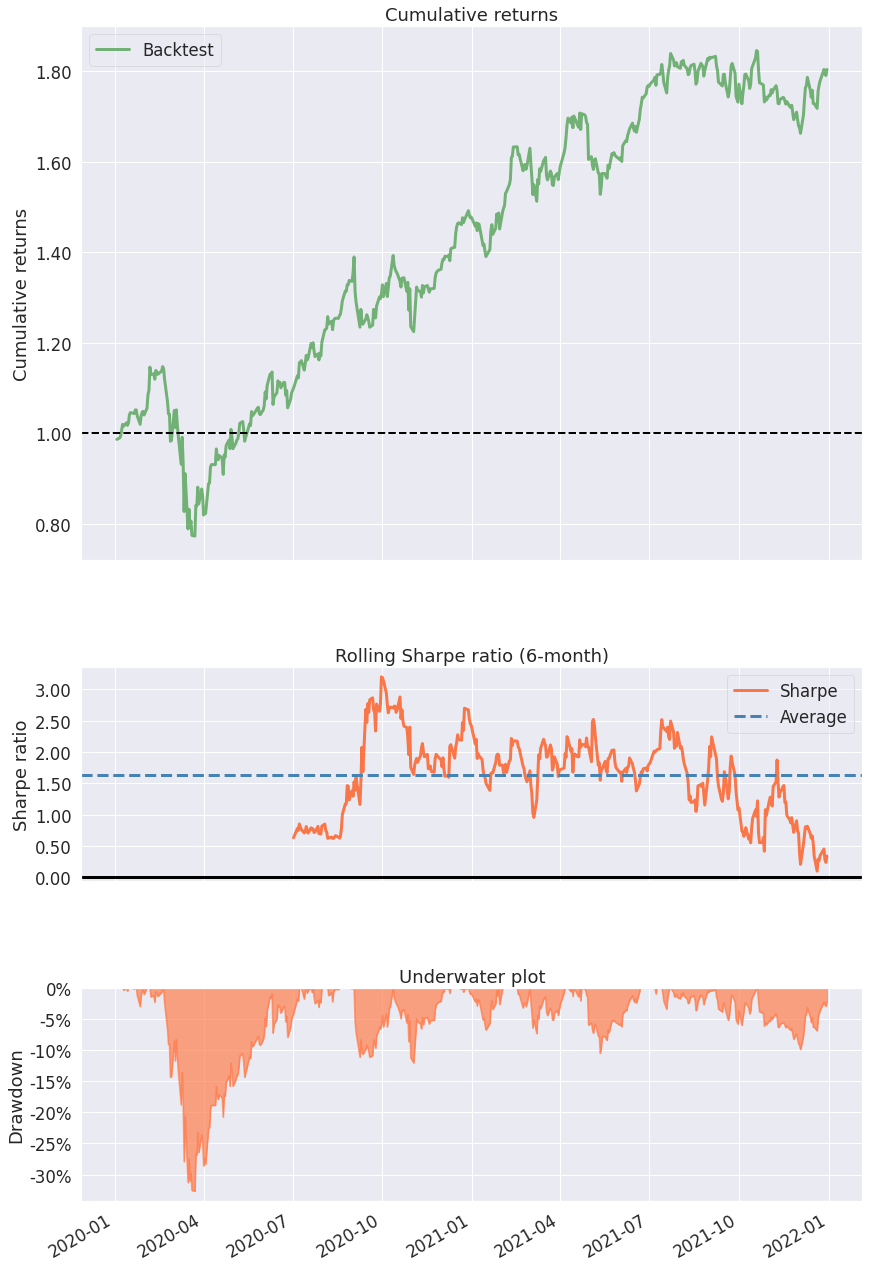

In [15]:
pf.create_simple_tear_sheet(portfolio_returns)

# 몬테카를로 시뮬레이션을 사용해 효율적 경계선 찾기

In [17]:
N_PORTFOLIOS = 10 ** 5
N_DAYS = 252
RISKY_ASSETS = ['META', 'TSLA', 'TWTR', 'MSFT']
RISKY_ASSETS.sort()
START_DATE = '2018-01-01'
END_DATE = '2018-12-31'

n_assets = len(RISKY_ASSETS)

In [18]:
prices_df = yf.download(RISKY_ASSETS,
                        start=START_DATE, 
                        end=END_DATE,
                        adjusted=True)

print(f'Downloaded {prices_df.shape[0]} rows of data.')

[*********************100%***********************]  4 of 4 completed
Downloaded 250 rows of data.


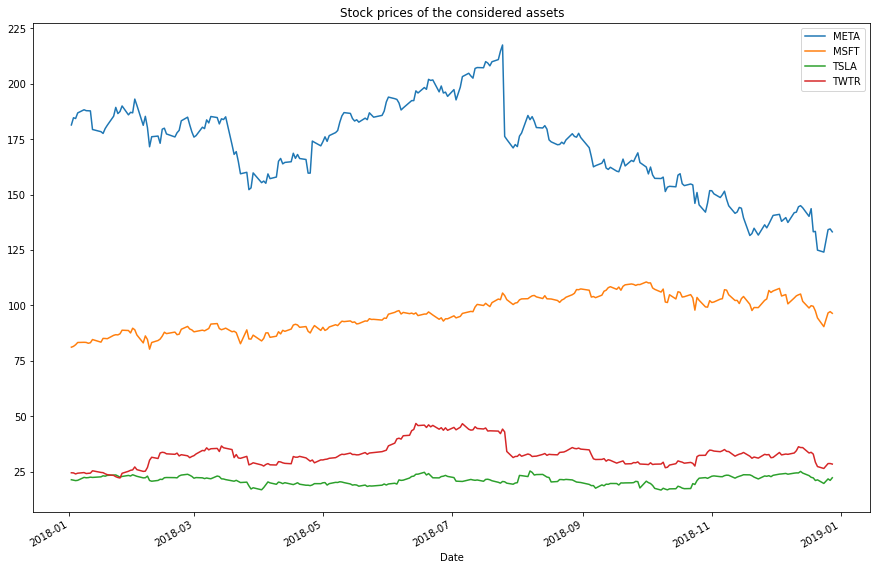

In [20]:
prices_df['Adj Close'].plot(title='Stock prices of the considered assets', figsize=(15,10))

In [21]:
# 연납화 평균 수익률과 해당 표준 편차를 계산
returns_df = prices_df['Adj Close'].pct_change().dropna()

avg_returns = returns_df.mean() * N_DAYS
cov_mat = returns_df.cov() * N_DAYS

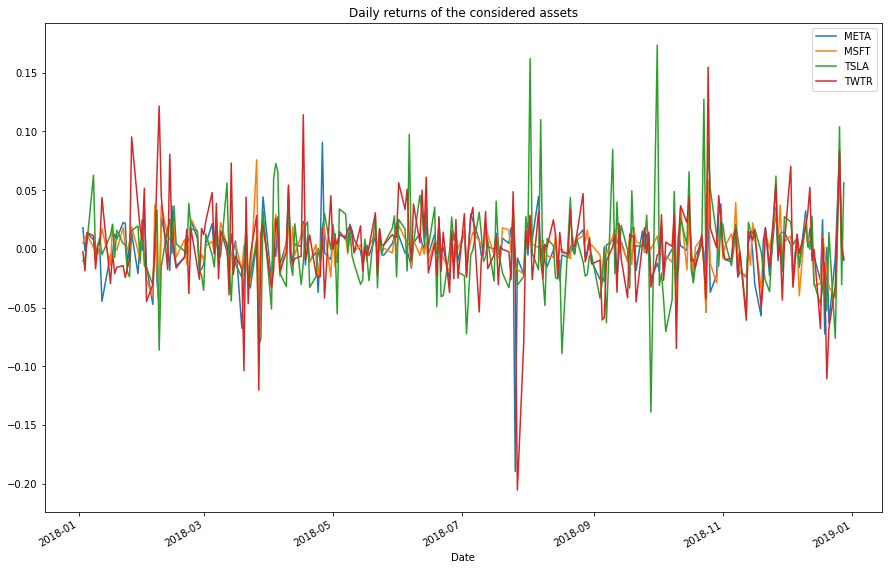

In [22]:
returns_df.plot(title='Daily returns of the considered assets', figsize=(15,10))

In [23]:
# 랜덤 포트폴리오 가중치 시뮬레이션
np.random.seed(2022)
weights = np.random.random(size=(N_PORTFOLIOS, n_assets))
weights /=  np.sum(weights, axis=1)[:, np.newaxis]

In [24]:
# 포트폴리오 지표 계산
portf_rtns = np.dot(weights, avg_returns)

portf_vol = []

for i in range(0, len(weights)):

    portf_vol.append(np.sqrt(np.dot(weights[i].T, np.dot(cov_mat, weights[i]))))
    
portf_vol = np.array(portf_vol)  
portf_sharpe_ratio = portf_rtns / portf_vol

In [25]:
portf_results_df = pd.DataFrame({'returns': portf_rtns,
                                 'volatility': portf_vol,
                                 'sharpe_ratio': portf_sharpe_ratio})

In [26]:
portf_results_df.head()

,returns,volatility,sharpe_ratio
0,0.215350,0.291705,0.738247
1,0.124099,0.353294,0.351263
2,0.116220,0.339313,0.342517
3,0.091507,0.307711,0.297379
4,0.141915,0.367695,0.385958


In [27]:
# 효율적 경계선을 생선하는 점
N_POINTS = 100
portf_vol_ef = []
indices_to_skip = []

portf_rtns_ef = np.linspace(portf_results_df.returns.min(), 
                            portf_results_df.returns.max(), 
                            N_POINTS)

portf_rtns_ef = np.round(portf_rtns_ef, 2)    
portf_rtns = np.round(portf_rtns, 2)

for point_index in range(N_POINTS):

    if portf_rtns_ef[point_index] not in portf_rtns:

        indices_to_skip.append(point_index)

        continue
        
    matched_ind = np.where(portf_rtns == portf_rtns_ef[point_index])
    portf_vol_ef.append(np.min(portf_vol[matched_ind]))
    
portf_rtns_ef = np.delete(portf_rtns_ef, indices_to_skip)

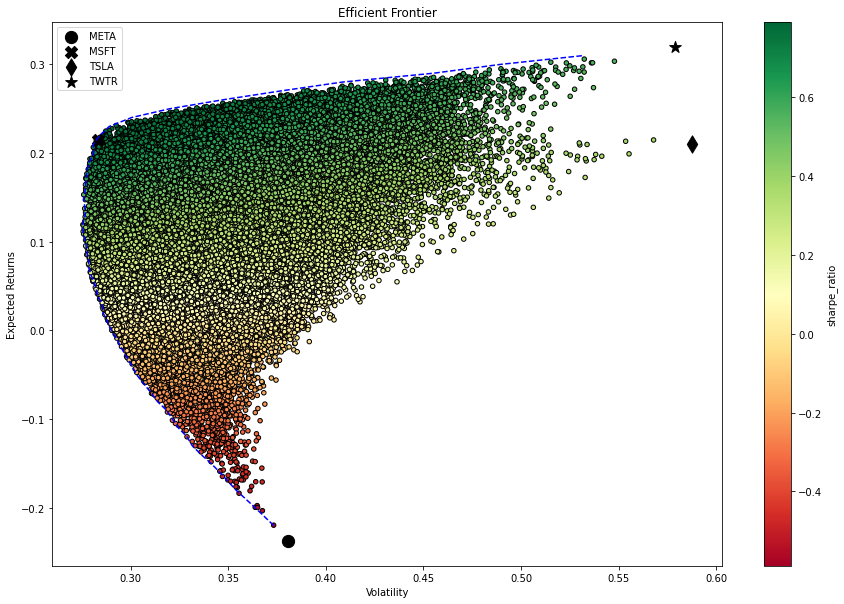

In [30]:
MARKS = ['o', 'X', 'd', '*']

fig, ax = plt.subplots()

portf_results_df.plot(kind='scatter', x='volatility', 
                      y='returns', c='sharpe_ratio',
                      cmap='RdYlGn', edgecolors='black', 
                      ax=ax,
                      figsize = (15, 10))

ax.set(xlabel='Volatility', 
       ylabel='Expected Returns', 
       title='Efficient Frontier')

ax.plot(portf_vol_ef, portf_rtns_ef, 'b--')

for asset_index in range(n_assets):

    ax.scatter(x=np.sqrt(cov_mat.iloc[asset_index, asset_index]), 
                y=avg_returns[asset_index], 
                marker=MARKS[asset_index], 
                s=150, 
                color='black',
                label=RISKY_ASSETS[asset_index])
    
ax.legend()

# Scipy 최적화로 효율적 경계선 찾기

In [32]:
# 포트폴리오 수익률 
def get_portf_rtn(w, avg_rtns):

    return np.sum(avg_rtns * w)

# 포트폴리오 변동성
def get_portf_vol(w, avg_rtns, cov_mat):

    return np.sqrt(np.dot(w.T, np.dot(cov_mat, w)))

In [33]:
# 효율적 경계선 계싼
def get_efficient_frontier(avg_rtns, cov_mat, rtns_range):
    
    efficient_portfolios = []
    
    n_assets = len(avg_returns)
    args = (avg_returns, cov_mat)
    bounds = tuple((0,1) for asset in range(n_assets))
    initial_guess = n_assets * [1. / n_assets, ]
    
    for ret in rtns_range:

        constraints = ({'type': 'eq', 
                        'fun': lambda x: get_portf_rtn(x, avg_rtns) - ret},
                       {'type': 'eq', 
                        'fun': lambda x: np.sum(x) - 1})
        
        efficient_portfolio = sco.minimize(get_portf_vol, initial_guess, 
                                           args=args, method='SLSQP', 
                                           constraints=constraints,
                                           bounds=bounds)
        
        efficient_portfolios.append(efficient_portfolio)
    
    return efficient_portfolios

In [34]:
rtns_range = np.linspace(-0.22, 0.32, 200)

In [35]:
efficient_portfolios = get_efficient_frontier(avg_returns, 
                                              cov_mat, 
                                              rtns_range)

In [36]:
vols_range = [x['fun'] for x in efficient_portfolios]

[Text(0, 0.5, 'Expected Returns'),
 Text(0.5, 0, 'Volatility'),
 Text(0.5, 1.0, 'Efficient Frontier')]

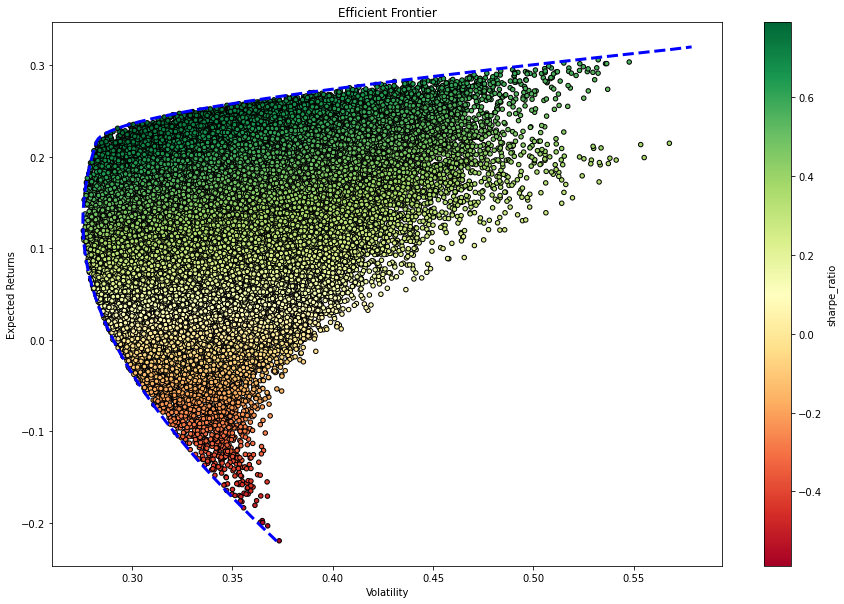

In [37]:
fig, ax = plt.subplots()

portf_results_df.plot(kind='scatter', x='volatility', 
                      y='returns', c='sharpe_ratio',
                      cmap='RdYlGn', edgecolors='black', 
                      ax=ax,
                      figsize = (15, 10))

ax.plot(vols_range, rtns_range, 'b--', linewidth=3)

ax.set(xlabel='Volatility', 
       ylabel='Expected Returns', 
       title='Efficient Frontier')

In [38]:
# 최소 변동성 포트폴리오
min_vol_ind = np.argmin(vols_range)
min_vol_portf_rtn = rtns_range[min_vol_ind]
min_vol_portf_vol = efficient_portfolios[min_vol_ind]['fun']

min_vol_portf = {'Return': min_vol_portf_rtn,
                 'Volatility': min_vol_portf_vol,
                 'Sharpe Ratio': (min_vol_portf_rtn / 
                                  min_vol_portf_vol)}

min_vol_portf

{'Return': 0.13005025125628142,
 'Volatility': 0.2754156413897548,
 'Sharpe Ratio': 0.4721963160844618}

In [39]:
print('Minimum Volatility portfolio ----')
print('Performance')

for index, value in min_vol_portf.items():
    print(f'{index}: {100 * value:.2f}% ', end="", flush=True)

print('\nWeights')

for x, y in zip(RISKY_ASSETS, efficient_portfolios[min_vol_ind]['x']):
    print(f'{x}: {100*y:.2f}% ', end="", flush=True)

Minimum Volatility portfolio ----
Performance
Return: 13.01% Volatility: 27.54% Sharpe Ratio: 47.22% 
Weights
META: 18.65% MSFT: 77.34% TSLA: 4.01% TWTR: 0.00% 